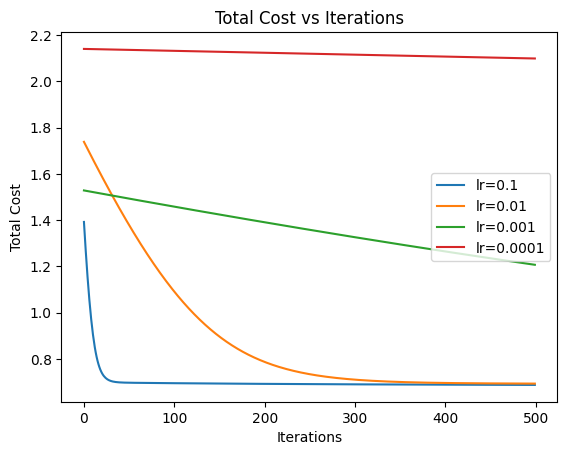

,Learning Rate,Test Accuracy
0,0.1000,47.0
1,0.0100,49.5
2,0.0010,50.5
3,0.0001,50.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Load the dataset from CSV
def loadDataFromCsv(filePath):
    data = pd.read_csv(filePath)
    X = data.iloc[:, 1:-1].values  # Exclude CustomerID and Churn columns
    Y = data.iloc[:, -1].values    # Churn column
    return X, Y

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression training function
def trainLogisticRegression(XTrain, YTrain, lr, maxIter):
    nSamples, nFeatures = XTrain.shape
    theta = np.random.rand(nFeatures + 1)  # Initialize weights and bias
    XTrain = np.hstack((XTrain, np.ones((nSamples, 1))))  # Add bias term
    history = []

    for _ in range(maxIter):
        totalCost = 0
        gradients = np.zeros_like(theta)

        for i in range(nSamples):
            z = np.dot(XTrain[i], theta)
            h = sigmoid(z)
            cost = -YTrain[i] * np.log(h) - (1 - YTrain[i]) * np.log(1 - h)
            totalCost += cost
            gradients += (h - YTrain[i]) * XTrain[i]

        totalCost /= nSamples
        history.append(totalCost)
        gradients /= nSamples
        theta -= lr * gradients

    return theta, history

# Validation function
def validate(XTest, YTest, theta):
    nSamples = XTest.shape[0]
    XTest = np.hstack((XTest, np.ones((nSamples, 1))))  # Add bias term
    correct = 0

    for i in range(nSamples):
        z = np.dot(XTest[i], theta)
        h = sigmoid(z)
        prediction = 1 if h >= 0.5 else 0
        if prediction == YTest[i]:
            correct += 1

    return correct / nSamples * 100


X, Y = loadDataFromCsv('dataset.csv')

# Normalize the dataset
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Split into training and test sets
splitIndex = int(0.8 * len(X))
XTrain, XTest = X[:splitIndex], X[splitIndex:]
YTrain, YTest = Y[:splitIndex], Y[splitIndex:]

learningRates = [0.1, 0.01, 0.001, 0.0001]
maxIter = 500

results = []

# Train and validate for each learning rate
for lr in learningRates:
    theta, history = trainLogisticRegression(XTrain, YTrain, lr, maxIter)
    testAcc = validate(XTest, YTest, theta)

    # Append the result to the results list
    results.append((lr, testAcc))

    # Plot total cost vs iterations
    plt.plot(history, label=f"lr={lr}")

# Plot settings
plt.title("Total Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Total Cost")
plt.legend()
plt.show()

# Display results at the end
resultsDf = pd.DataFrame(results, columns=["Learning Rate", "Test Accuracy"])
display(resultsDf)